# <h1 style="text-align: center;">Caso de estudio - Propiedad Markoviana y Homogeneidad</h1>

**Integrantes**
* Sofia Isabella Endara Chitiva
* Juan David Lasso Arias
* Néstor Andres Tabares David
* Nicolás Joel Cáceres Parra


# <h1 style='text-align: center;'>Introducción</h1>

Este estudio se centra en el mercado de divisas, analizando el comportamiento de las tasas de cambio del Yen Japonés (JPY), la Libra Esterlina (GBP), el Franco Suizo (CHF) y el Peso Mexicano (MXN) frente al Peso Colombiano (COP) durante los últimos cuatro años. El objetivo principal es explorar la dinámica de este mercado y evaluar si los movimientos de las tasas de cambio siguen un proceso markoviano; es decir, si el estado futuro de una variable depende únicamente de su estado presente y no de estados pasados. Al identificar las propiedades estadísticas de estos procesos, se busca desarrollar modelos probabilísticos para pronosticar los estados futuros de las divisas extranjeras. En este apartado de ejemplo, se explicará la construcción de la cadena de Markov, la prueba markoviana y la prueba de hipótesis utilizando el yen japonés (JPY) como referencia. Sin embargo, este mismo procedimiento se aplicará a todas las demás divisas.

# Librerías

Para el proyecto se utilizaron las siguientes librerías que facilitan la importación, manipulación y construcción de datos y modelos usados en el caso de estudio.

In [1]:
import pandas as pd #Para manejo de datos en DataFrames y funciónes de analítica de datos
import numpy as np #Para manejo de datos numéricos y arreglos
import matplotlib.pyplot as plt #Para la visualización de datos
import seaborn as sns #Para la visualización de datos
import scipy.stats as stats #Para realizar pruebas de hipótesis y estadiísticas
import warnings #Para evitar promptes de advertencia
warnings.filterwarnings('ignore') # evita warnings innecesarios al ejecutar código

# Importación de datos

Los datos fueron descargados directamente de la sección de [monedas disponibles](https://www.banrep.gov.co/es/estadisticas/monedas-disponibles)  en la página web del Banco de la República de Colombia, tomando el intervalo de tiempo del 6 de agosto de 2020 al 6 de agosto de 2024, con la media diaria de la tasa representativa de mercado (TRM). Este [enlace](https://totoro.banrep.gov.co/analytics/saw.dll?Go&Action=prompt&path=%2Fshared%2fSeries%20Estad%c3%adsticas_T%2F1.%20Monedas%20disponibles%2F1.2.TCM_Serie%20para%20un%20rango%20de%20fechas%20dado&Options=rdf&lang=es&NQUser=publico&NQPassword=publico123) permite realizar la consulta de los datos utilizados, teniendo en cuenta el rango de tiempos y la tasa media. El archivo fue descargado en formato CSV y cargado a un repositorio de GitHub, a partir del cual se obtuvo este [enlace](https://raw.githubusercontent.com/NicolasCacer/bases-de-datos/main/1.2.TCM_Serie%20para%20un%20rango%20de%20fechas%20dado.csv)  los datos sin procesar para que sean accesibles por cualquier persona.

In [2]:
url = 'https://raw.githubusercontent.com/NicolasCacer/bases-de-datos/main/1.2.TCM_Serie%20para%20un%20rango%20de%20fechas%20dado.csv'
df = pd.read_csv(url)
df.head()

,Fecha (dd/mm/aaaa),año,Moneda,Continente,Tipo de cambio,Tipo de tasa,Tasa Cambio,Id Moneda
0,2020-08-06,2020,Franco suizo,EUROPA,Dólares estadounidenses por cada moneda,Venta,"1,098049",CHF
1,2020-08-06,2020,Franco suizo,EUROPA,Moneda por cada dólar estadounidense,Venta,"0,9111",CHF
2,2020-08-06,2020,Franco suizo,EUROPA,Pesos colombianos por cada moneda,Venta,"4146,20621",CHF
3,2020-08-06,2020,Libra esterlina,EUROPA,Dólares estadounidenses por cada moneda,Venta,"1,3145",GBP
4,2020-08-06,2020,Libra esterlina,EUROPA,Moneda por cada dólar estadounidense,Venta,"0,76097",GBP


Ya estando los datos almacenados en el DataFrame `df` se puede revisar si se han importado correctamente y su integridad. Por ende, se debe revisar si existen valores faltantes y reconocer la estructura original de la base de datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52632 entries, 0 to 52631
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fecha (dd/mm/aaaa)  52632 non-null  object
 1    año                52632 non-null  int64 
 2   Moneda              52632 non-null  object
 3   Continente          52632 non-null  object
 4   Tipo de cambio      52632 non-null  object
 5   Tipo de tasa        52632 non-null  object
 6   Tasa Cambio         52632 non-null  object
 7   Id Moneda           52632 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.2+ MB


Del análisis del código anterior, se pudo observar que los datos consisten en 52,632 registros para cada una de las 8 columnas, sin contener ningún dato nulo aparentemente. La información que se encuentra allí incluye la fecha, el año, el nombre de la moneda, el continente, el tipo de cambio, el tipo de tasa, la tasa de cambio y el identificador de la moneda. A continuación, se mostrarán los posibles valores que se encuentran en cada una de las columnas.


In [4]:
df.isnull().sum()

Fecha (dd/mm/aaaa)    0
 año                  0
Moneda                0
Continente            0
Tipo de cambio        0
Tipo de tasa          0
Tasa Cambio           0
Id Moneda             0
dtype: int64

In [5]:
for i in df.select_dtypes(include='object').columns:
    print('* '+i+": \n ", df[i].unique(),'\n')

* Fecha (dd/mm/aaaa): 
  ['2020-08-06' '2020-08-07' '2020-08-08' ... '2024-08-04' '2024-08-05'
 '2024-08-06'] 

* Moneda: 
  ['Franco suizo' 'Libra esterlina' 'Peso mexicano' 'Yen japonés'] 

* Continente: 
  ['EUROPA' 'AMERICA' 'ASIA DEL PACIFICO'] 

* Tipo de cambio: 
  ['Dólares estadounidenses por cada moneda'
 'Moneda por cada dólar estadounidense'
 'Pesos colombianos por cada moneda'] 

* Tipo de tasa: 
  ['Venta' 'Media' 'Compra'] 

* Tasa Cambio: 
  ['1,098049' '0,9111' '4146,20621' ... '19,367499' '215,991739' '28,961099'] 

* Id Moneda: 
  ['CHF' 'GBP' 'MXN' 'JPY'] 



Vale la pena resaltar que las fechas se encuentran en el formato de (aaaa/mm/dd), invertido al orden que se indica en el encabezado de los datos. Se notó que, al momento de descargar los datos en formato CSV, el orden se invierte. Por esta razón, se tuvo presente esta corrección en los datos. También, los encabezados de las columnas son largos y tienen espacios entre palabras, lo que puede resultar en dificultades de interpretación para Python. En consecuencia, se procede a renombrar los encabezados de las columnas.

In [6]:
# La fecha sostendrá el formato de (aaaa/mm/dd)
df.columns = ['Fecha', ' Año', 'Nombre_Moneda', 'Continente', 'Cambio', 'Tipo_tasa', 'TRM', 'Id_Moneda']

Adicionalmente, con respecto a las fechas, se notó que los fines de semana estaban registrados en los datos, tomando constante la TRM de cada sábado para el domingo. Por esta razón, se decidió remover los domingos de los datos de fecha como se muestra a continuación

In [7]:
Sundays = df['Fecha'].unique().tolist()[3::7]
keep = set(df['Fecha'].unique().tolist())
dates = keep.difference(Sundays)
dates =list(dates)
dates.sort()
df = df[df['Fecha'].isin(dates)]
print(df)

            Fecha   Año    Nombre_Moneda         Continente  \
0      2020-08-06  2020     Franco suizo             EUROPA   
1      2020-08-06  2020     Franco suizo             EUROPA   
2      2020-08-06  2020     Franco suizo             EUROPA   
3      2020-08-06  2020  Libra esterlina             EUROPA   
4      2020-08-06  2020  Libra esterlina             EUROPA   
...           ...   ...              ...                ...   
52627  2024-08-06  2024    Peso mexicano            AMERICA   
52628  2024-08-06  2024    Peso mexicano            AMERICA   
52629  2024-08-06  2024      Yen japonés  ASIA DEL PACIFICO   
52630  2024-08-06  2024      Yen japonés  ASIA DEL PACIFICO   
52631  2024-08-06  2024      Yen japonés  ASIA DEL PACIFICO   

                                        Cambio Tipo_tasa         TRM Id_Moneda  
0      Dólares estadounidenses por cada moneda     Venta    1,098049       CHF  
1         Moneda por cada dólar estadounidense     Venta      0,9111       CHF  


A partir del código anterior, se puede observar toda la información almacenada en la base de datos original. Con esto, ya se pueden delimitar los datos que realmente se van a utilizar. Para este caso de estudio, se desea comparar las monedas extranjeras tomando el peso colombiano como punto de referencia; adicionalmente, se utilizará el tipo de tasa media, ya que se quiere conservar la mayor cantidad de información posible en cada dato. Al tomar la media como la tasa de cambio, se estaría involucrando la fluctuación ponderada diaria tanto de venta como de compra de las divisas. En contraste, si se tomara solo la tasa de venta o compra, se podría omitir información importante sobre el comportamiento en otro tipo de transacciones económicas intradía.

Para este modelo se trabaja bajos los supuestos de que la variable aletaoria de precio en el día t opera en un espacio muestral de 4 estados posibles según dos criterios, la variación porcentual y la desviación estándar móvil. Con estos dos indicadores se clasificó la dirección y la intensidad de la variación de precio en el día t.

# Limpieza de datos



Ahora se requiere filtrar y reorganizar los datos de tal manera que se obtenga una única tabla que contenga la TRM media en pesos colombianos por cada moneda para cada fecha de registro. Adicionalmente se observó que la TRM se encontraba en formato de texto, pero en realidad debería estar un formato numerico. En consecuencia, se requiere formatear la TRM para remplazar comas por puntos decimales y asignarles el tipo de variable `float`.

In [8]:
COP_Med_Data = df.query("Cambio == 'Pesos colombianos por cada moneda' and Tipo_tasa == 'Media'")
COP_Med_Data['TRM'] = COP_Med_Data['TRM'].str.replace(',','.').astype(float)
COP_Med_Data

,Fecha,Año,Nombre_Moneda,Continente,Cambio,Tipo_tasa,TRM,Id_Moneda
17546,2020-08-06,2020,Franco suizo,EUROPA,Pesos colombianos por cada moneda,Media,4145.295860,CHF
17549,2020-08-06,2020,Libra esterlina,EUROPA,Pesos colombianos por cada moneda,Media,4962.731079,GBP
17552,2020-08-06,2020,Peso mexicano,AMERICA,Pesos colombianos por cada moneda,Media,168.702869,MXN
17555,2020-08-06,2020,Yen japonés,ASIA DEL PACIFICO,Pesos colombianos por cada moneda,Media,35.782510,JPY
17558,2020-08-07,2020,Franco suizo,EUROPA,Pesos colombianos por cada moneda,Media,4130.239940,CHF
...,...,...,...,...,...,...,...,...
35075,2024-08-05,2024,Yen japonés,ASIA DEL PACIFICO,Pesos colombianos por cada moneda,Media,28.832560,JPY
35078,2024-08-06,2024,Franco suizo,EUROPA,Pesos colombianos por cada moneda,Media,4907.981929,CHF
35081,2024-08-06,2024,Libra esterlina,EUROPA,Pesos colombianos por cada moneda,Media,5317.617650,GBP
35084,2024-08-06,2024,Peso mexicano,AMERICA,Pesos colombianos por cada moneda,Media,216.019610,MXN


Ahora que ya se tiene la información de interés, se procede a realizar un nuevo DataFrame llamado `data`, el cual contendrá únicamente la TRM de cada moneda para cada fecha, asegurando que esta información se encuentre en formato `float`, como se puede observar en el código siguiente. Por lo tanto, se creará una columna por cada moneda y cada fecha corresponderá a la fecha de registro.

In [9]:
data_original = pd.DataFrame(columns=df['Id_Moneda'].unique().tolist(), index=df['Fecha'].unique())
for i in data_original.index:
    row = list(COP_Med_Data.query("Fecha == @i")['TRM'])
    data_original.loc[i] = row
data_original = data_original.astype(float)
data_original

,CHF,GBP,MXN,JPY
2020-08-06,4145.295860,4962.731079,168.702869,35.782510
2020-08-07,4130.239940,4919.796309,167.470169,35.601540
2020-08-08,4130.239940,4919.796309,167.470169,35.601540
2020-08-10,4122.110440,4934.121060,167.425549,35.638570
2020-08-11,4115.286790,4933.332870,168.414890,35.412759
...,...,...,...,...
2024-08-01,4645.166449,5194.189940,218.394710,27.056300
2024-08-02,4721.997199,5195.776340,213.087880,27.663570
2024-08-03,4783.950179,5263.945340,215.883610,28.026520
2024-08-05,4841.710339,5244.215559,209.771610,28.832560


Al final, se obtendrá una nueva base de datos que contiene la TRM de cada moneda en pesos colombianos para cada fecha. Lo que falta por revisar es la frecuencia temporal que se manejará para los modelos. Se decidió utilizar el tiempo en unidades diarias; es decir, se tomará un único registro diario para la tasa de cambio por moneda. Adicionalmente, conviene implementar la secuencia temporal sobre las filas para indicar el paso progresivo de los meses a partir del mes cero.

In [10]:
data = data_original.copy()
data.index = np.arange(0, data.shape[0])
print(data)

              CHF          GBP         MXN        JPY
0     4145.295860  4962.731079  168.702869  35.782510
1     4130.239940  4919.796309  167.470169  35.601540
2     4130.239940  4919.796309  167.470169  35.601540
3     4122.110440  4934.121060  167.425549  35.638570
4     4115.286790  4933.332870  168.414890  35.412759
...           ...          ...         ...        ...
1248  4645.166449  5194.189940  218.394710  27.056300
1249  4721.997199  5195.776340  213.087880  27.663570
1250  4783.950179  5263.945340  215.883610  28.026520
1251  4841.710339  5244.215559  209.771610  28.832560
1252  4907.981929  5317.617650  216.019610  28.965109

[1253 rows x 4 columns]


Ya con el DataFrame denominado `data`, se puede realizar una breve observación del comportamiento de los datos de manera gráfica. Para ello, se revisó inicialmente cuál es la distribución de frecuencia de los precios observados para cada moneda.

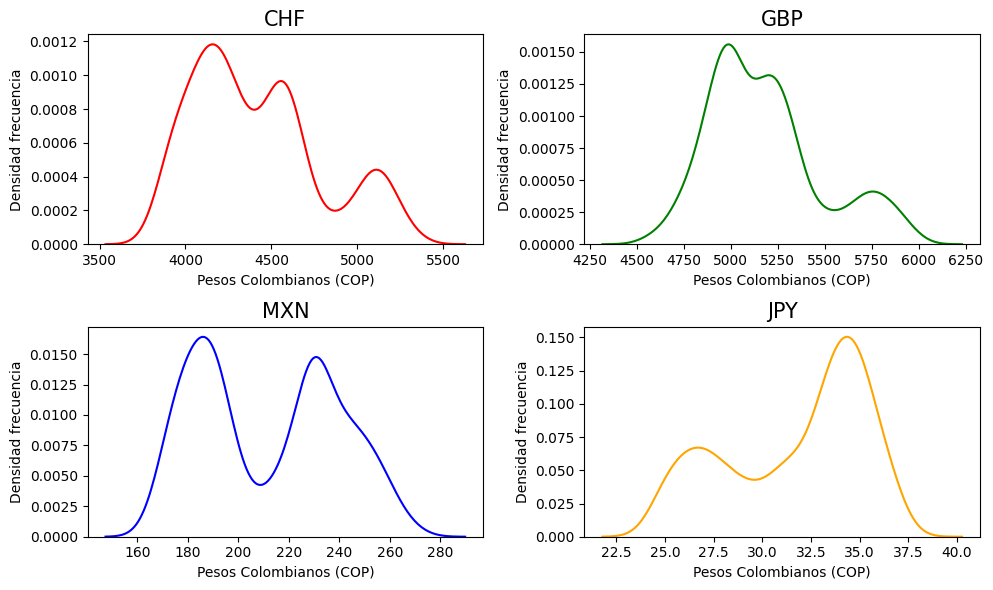

In [11]:
rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols,figsize=(10, 6))
n = 0
colors = ["red", "green", "blue", "orange"]
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(data = data.iloc[:,n], ax = axes[i,j], legend=True, color=colors[n])
        axes[i,j].set_xlabel('Pesos Colombianos (COP)', fontsize=10)
        axes[i,j].set_ylabel('Densidad frecuencia')
        axes[i,j].set_title(data.columns[n], fontsize = 15)
        n+=1
plt.tight_layout()
plt.show()

Como se puede observar, la mayoría de las monedas tienden a tener una distribución bimodal, que es más acentuada en monedas como el MXN. También se puede ver que las dos monedas europeas tienen, en promedio, un valor mucho más alto que las monedas de Asia y América

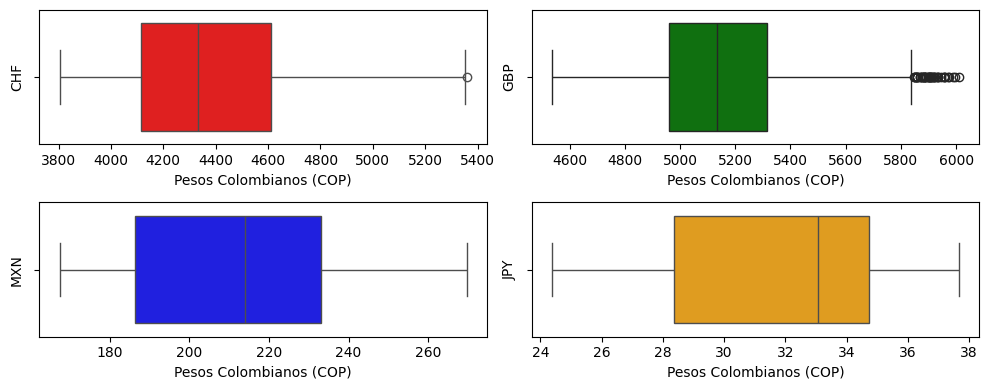

In [12]:
fig, axes = plt.subplots(rows, cols,figsize=(10, 4))
n = 0
colors = ["red", "green", "blue", "orange"]
for i in range(rows):
    for j in range(cols):
        sns.boxplot(x = data.iloc[:,n], ax = axes[i,j], legend=True, color=colors[n])
        axes[i,j].set_xlabel('Pesos Colombianos (COP)')
        axes[i,j].set_ylabel(data.columns[n], fontsize=10)
        n+=1
plt.tight_layout()
plt.show()

A partir de estos diagramas de Boxplot, se puede observar que la única moneda que presentó valores atípicos es la libra esterlina, cuando su precio se hallaba más allá, aproximadamente, de los $5.843 COP. Esto sugiere que para reducir el ruido en los datos, se podrían remover estos valores del modelo cuando se utilice la GBP.

In [13]:
q1 = data['GBP'].quantile(0.25)
q3 = data['GBP'].quantile(0.75)
upper_limit = q3 + 1.5 * (q3 - q1)
print('$',upper_limit.round(5), 'COP')

$ 5843.15748 COP


Como se puede observar, los precios por encima de esa barrera son los que muestran el comportamiento atípico de la moneda. Esto se tendrá presente para los modelos.

# <h1 style="text-align: center;">Estructuración Del Modelo</h1>

En esta sección, se llevará a cabo la definición de los estados finitos de la cadena de Markov y la creación del modelo que se ajuste a cada una de las divisas.

## Estados del mercado
Para definir los estados finitos de la cadena de markov y la prueba de homogeneidad

In [14]:
Estados = ['D2','D1','I1','I2']
def final_states(D=data, currency='JPY',n_per=6):
    currency = currency.upper()
    D = pd.DataFrame(data[currency])
    D['Mob_std'] = D[currency].rolling(n_per).std()
    D['Cambio_%'] = D[currency].pct_change()
    D['Estado_%'] = np.where(D['Cambio_%']>=0, 1, -1)
    D['Estado_mob'] = np.where(D['Cambio_%'].abs()> (D['Mob_std']/D[currency]).values, 2, 1)
    D['Estado'] = D['Estado_%'].values * D['Estado_mob'].values
    D['Estado'] = np.where(D['Estado']==-2, Estados[0], np.where(D['Estado']==-1, Estados[1], np.where(D['Estado']==1, Estados[2], Estados[3])))
    D = D.drop(columns=[currency,'Mob_std','Cambio_%', 'Estado_%', 'Estado_mob'])
    D = D[n_per:]
    D.reset_index(drop=True, inplace = True)
    return D

El propósito es clasificar los cambios en el valor de una moneda en diferentes estados, basados en su cambio porcentual y su desviación estándar móvil. Al hacerlo, se pueden identificar patrones y tendencias en el comportamiento de la moneda, lo cual es útil para la toma de decisiones con la matriz de transición, ya que permite evaluar la volatilidad y la dirección de los movimientos del mercado. En este caso, los 4 estados de las divisas son los siguientes:

D2: Disminución notable
D1: Devaluación
I1: Incremento
I2: Incremento notable

## Cadena de Markov de Primer Orden

In [15]:
Data = final_states(currency='JPY',n_per=6)
Data

,Estado
0,I1
1,I2
2,I1
3,I1
4,I1
...,...
1242,D1
1243,I1
1244,I1
1245,I1


### Estado Anterior, Actual y Siguiente

In [16]:
Data.columns = ["x_t"]
Data["x_t+1"] = Data["x_t"].shift(-1)
Data["x_t+2"] = Data["x_t+1"].shift(-1)
Data

,x_t,x_t+1,x_t+2
0,I1,I2,I1
1,I2,I1,I1
2,I1,I1,I1
3,I1,I1,D1
4,I1,D1,D2
...,...,...,...
1242,D1,I1,I1
1243,I1,I1,I1
1244,I1,I1,I1
1245,I1,I1,None


En este caso, con la divisa de Japón se categoriza con la función mencionada anteriormente `final_state`, y se crean dos columnas más: `Actual y Siguiente`, que permiten analizar cómo los estados de la moneda cambian en los periodos, proporcionando una visión más completa de las tendencias y patrones a lo largo del tiempo

### Frecuencia Observada

In [17]:
freq_obs = pd.DataFrame(columns=("Anterior", "Actual") )
for i in Estados:
    for j in Estados:
        freq_obs.loc[len(freq_obs)] = [i,j]
for i in Estados +["Total"]:
    freq_obs[i] = 0
for i in freq_obs.index:
    for j in Estados:
        for k in Data.index:
            if freq_obs.loc[i].tolist()[:2]+[j] == Data.loc[k].tolist():
                freq_obs.loc[i, j] += 1
    freq_obs["Total"] = freq_obs[[Estados[0],Estados[1],Estados[2],Estados[3]]].sum(axis=1)
print(freq_obs)

   Anterior Actual  D2  D1  I1  I2  Total
0        D2     D2   4  17  14   8     43
1        D2     D1   7  26  27   7     67
2        D2     I1  10  24  23  11     68
3        D2     I2  12  21  13   8     54
4        D1     D2   9  23  24  15     71
5        D1     D1  20  59  34  29    142
6        D1     I1  26  43  38  16    123
7        D1     I2  20  19  18  17     74
8        I1     D2  16  18  15  19     68
9        I1     D1  30  38  37  30    135
10       I1     I1  25  46  38  18    127
11       I1     I2  14  16  20   6     56
12       I2     D2  14   9  15  12     50
13       I2     D1  14  19  25   8     66
14       I2     I1   7  22  29  10     68
15       I2     I2   4  10  17   2     33


Se realiza una tabla de frecuencia en el cual se examinan todas las combinaciones posibles entre los valores de las columnas `Anterior, Actual y Siguiente`. Para cada combinación única identificada en la base de datos denominada `Data`, se procede a contabilizar la frecuencia de su aparición.

Frecuencia Esperada

In [18]:
freq_esp = freq_obs.copy()
for i in freq_esp.columns[2:]:
    freq_esp[i] = 0
for i in freq_esp.index:
    for j in Estados:
        for k in Data.index:
            if [freq_esp.loc[i].tolist()[1]]+[j] == Data.loc[k].tolist()[1:3]:
                freq_esp.loc[i, j] += 1
    freq_esp["Total"] = freq_esp[[Estados[0],Estados[1],Estados[2],Estados[3]]].sum(axis=1)
print(freq_esp)

   Anterior Actual  D2   D1   I1  I2  Total
0        D2     D2  43   67   68  54    232
1        D2     D1  71  142  123  74    410
2        D2     I1  68  135  128  55    386
3        D2     I2  50   66   68  33    217
4        D1     D2  43   67   68  54    232
5        D1     D1  71  142  123  74    410
6        D1     I1  68  135  128  55    386
7        D1     I2  50   66   68  33    217
8        I1     D2  43   67   68  54    232
9        I1     D1  71  142  123  74    410
10       I1     I1  68  135  128  55    386
11       I1     I2  50   66   68  33    217
12       I2     D2  43   67   68  54    232
13       I2     D1  71  142  123  74    410
14       I2     I1  68  135  128  55    386
15       I2     I2  50   66   68  33    217


Se elabora una tabla de `frecuencia esperada` donde se incluyen todas las columnas presentes en la tabla de frecuencia observada, con la excepción de la columna `Anterior`. Se identifica y contabiliza la frecuencia de cada combinación única de valores presentes en la tabla de `frecuencia esperada` de la base de datos `Data`. Dado que en esta tabla más del 25% de los registros presentan una frecuencia superior a 5, no se requiere la concatenación de filas.

Probabilidad observada y esperada

In [19]:
prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
print(prob_obs)

          D2        D1        I1        I2
0   0.093023  0.395349  0.325581  0.186047
1   0.104478  0.388060  0.402985  0.104478
2   0.147059  0.352941  0.338235  0.161765
3   0.222222  0.388889  0.240741  0.148148
4   0.126761  0.323944  0.338028  0.211268
5   0.140845  0.415493  0.239437  0.204225
6   0.211382  0.349593  0.308943  0.130081
7   0.270270  0.256757  0.243243  0.229730
8   0.235294  0.264706  0.220588  0.279412
9   0.222222  0.281481  0.274074  0.222222
10  0.196850  0.362205  0.299213  0.141732
11  0.250000  0.285714  0.357143  0.107143
12  0.280000  0.180000  0.300000  0.240000
13  0.212121  0.287879  0.378788  0.121212
14  0.102941  0.323529  0.426471  0.147059
15  0.121212  0.303030  0.515152  0.060606


In [20]:
prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)
print(prob_esp)

          D2        D1        I1        I2
0   0.185345  0.288793  0.293103  0.232759
1   0.173171  0.346341  0.300000  0.180488
2   0.176166  0.349741  0.331606  0.142487
3   0.230415  0.304147  0.313364  0.152074
4   0.185345  0.288793  0.293103  0.232759
5   0.173171  0.346341  0.300000  0.180488
6   0.176166  0.349741  0.331606  0.142487
7   0.230415  0.304147  0.313364  0.152074
8   0.185345  0.288793  0.293103  0.232759
9   0.173171  0.346341  0.300000  0.180488
10  0.176166  0.349741  0.331606  0.142487
11  0.230415  0.304147  0.313364  0.152074
12  0.185345  0.288793  0.293103  0.232759
13  0.173171  0.346341  0.300000  0.180488
14  0.176166  0.349741  0.331606  0.142487
15  0.230415  0.304147  0.313364  0.152074


Para calcular la probabilidades observadas y esperadas se necesita de las tablas de `frecuencia observada y esperada` las columnas `Estados` y dividir eso entre el total de cada una de las frecuencias respectivamente.

### Prueba de Hipótesis Propiedad Markoviana

In [21]:
chi_2 = (((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]).sum()
deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
print(chi_2)
print(deg_free)

57.48190169331379
45


Conclusión de la prueba de hipotesis

In [22]:
alpha = 0.05
chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
print(chi2_inv)
if chi_2 < chi2_inv:
    Markov = "No se rechaza Ho"
else:
    Markov = "Se rechaza Ho"
print(Markov)

61.65623337627955
No se rechaza Ho


Se determina el valor crítico `chi2_inv` para un nivel de significancia del `5%`. Si el estadístico `chi-cuadrado` es menor que el valor crítico, no se rechaza la hipótesis nula `Ho`, lo que sugiere que el proceso puede ser modelado como una cadena de Markov. De lo contrario, se rechaza la hipótesis nula.

Creación de la tabla de frecuencia markoviana (Anterior y Actual)

In [23]:
freq_Markov = pd.DataFrame(0,columns= Estados+["Total"], index=Estados)
freq_Markov
for i in Estados:
    for j in Estados:
        for k in Data.index:
            if Data.loc[k].tolist()[:2] == [i,j]:
                freq_Markov.loc[i, j] += 1
    freq_Markov["Total"] = freq_Markov[[Estados[0],Estados[1],Estados[2],Estados[3]]].sum(axis=1)
freq_Markov

,D2,D1,I1,I2,Total
D2,43,67,68,54,232
D1,71,142,123,74,410
I1,68,135,128,56,387
I2,50,66,68,33,217


Se realiza una tabla de frecuencia en el cual se examinan todas las combinaciones posibles entre los valores de las columnas `Anterior y Actual`. Para cada combinación única identificada en la base de datos denominada `Data`, se procede a contabilizar la frecuencia de su aparición.

### Matríz de transición

In [24]:
prob_Markov = freq_Markov[Estados].div(freq_Markov["Total"], axis=0)
prob_Markov["Total"] = prob_Markov.sum(axis=1)
print(prob_Markov)

          D2        D1        I1        I2  Total
D2  0.185345  0.288793  0.293103  0.232759    1.0
D1  0.173171  0.346341  0.300000  0.180488    1.0
I1  0.175711  0.348837  0.330749  0.144703    1.0
I2  0.230415  0.304147  0.313364  0.152074    1.0


Para calcular la matríz de transición obtiene los datos de las columnas `Estados` de la tabla de `frecuencia de transición` y se divide en el total de la misma tabla.

### Función de la markoviana

Esta función crea la matríz de transición y la prueba de hipotesis de la cadena de Markov de cualquier divisa, con su respectivo limpieza de datos. 

In [25]:
def markoviana(currency, n_per = 6):

    Data = final_states(currency= currency,n_per=n_per)
    Data.columns = ["x_t"]
    Data["x_t+1"] = Data["x_t"].shift(-1)
    Data["x_t+2"] = Data["x_t+1"].shift(-1)

    freq_obs = pd.DataFrame(columns=("Anterior", "Actual") )
    for i in Estados:
        for j in Estados:
            freq_obs.loc[len(freq_obs)] = [i,j]
    for i in Estados +["Total"]:
        freq_obs[i] = 0
    for i in freq_obs.index:
        for j in Estados:
            for k in Data.index:
                if freq_obs.loc[i].tolist()[:2]+[j] == Data.loc[k].tolist():
                    freq_obs.loc[i, j] += 1
        freq_obs["Total"] = freq_obs[[Estados[0],Estados[1],Estados[2],Estados[3]]].sum(axis=1)

    freq_esp = freq_obs.copy()
    for i in freq_esp.columns[2:]:
        freq_esp[i] = 0
    for i in freq_esp.index:
        for j in Estados:
            for k in Data.index:
                if [freq_esp.loc[i].tolist()[1]]+[j] == Data.loc[k].tolist()[1:3]:
                    freq_esp.loc[i, j] += 1
        freq_esp["Total"] = freq_esp[[Estados[0],Estados[1],Estados[2],Estados[3]]].sum(axis=1)

    prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
    prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)
    resultado = ((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]
    chi_2 = resultado.sum()
    deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
    alpha = 0.05
    chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
    if chi_2 < chi2_inv:
        Markov = "No se rechaza Ho"
    else:
        Markov = "Se rechaza Ho"
    
    freq_Markov = pd.DataFrame(0,columns= Estados+["Total"], index=Estados)
    for i in Estados:
        for j in Estados:
            for k in Data.index:
                if Data.loc[k].tolist()[:2] == [i,j]:
                    freq_Markov.loc[i, j] += 1
        freq_Markov["Total"] = freq_Markov[[Estados[0],Estados[1],Estados[2],Estados[3]]].sum(axis=1)
    
    prob_Markov = freq_Markov[Estados].div(freq_Markov["Total"], axis=0)
    prob_Markov["Total"] = prob_Markov.sum(axis=1)
    
    ###################################

    print(f"-> Hipotesis markoviana\n    {Markov}")
    print("-----"*10)
    print("-> Frecuencia esperada")
    print(freq_esp)
    print("-----"*10)
    print("Matriz de transición")
    print(prob_Markov)

### Modelo de Markoviana para JPY

In [26]:
markoviana(currency= "JPY")

-> Hipotesis markoviana
    No se rechaza Ho
--------------------------------------------------
-> Frecuencia esperada
   Anterior Actual  D2   D1   I1  I2  Total
0        D2     D2  43   67   68  54    232
1        D2     D1  71  142  123  74    410
2        D2     I1  68  135  128  55    386
3        D2     I2  50   66   68  33    217
4        D1     D2  43   67   68  54    232
5        D1     D1  71  142  123  74    410
6        D1     I1  68  135  128  55    386
7        D1     I2  50   66   68  33    217
8        I1     D2  43   67   68  54    232
9        I1     D1  71  142  123  74    410
10       I1     I1  68  135  128  55    386
11       I1     I2  50   66   68  33    217
12       I2     D2  43   67   68  54    232
13       I2     D1  71  142  123  74    410
14       I2     I1  68  135  128  55    386
15       I2     I2  50   66   68  33    217
--------------------------------------------------
Matriz de transición
          D2        D1        I1        I2  Total
D2  0.18534

- Los estados `D1 e I1` tienen las mayores probabilidades de permanecer en el mismo estado `0.346341 y 0.3330749` respectivamente, lo que sugiere una cierta estabilidad en estos niveles.

- Desde `D2`, la transición más probable es hacia `I1` con `0.293103`

- Desde `D1`, la transición más probable es hacia `D1` con `0.346341`.

- Desde `I1`, la transición más probable es hacia `D1`  con `0.348837`.

- Desde `I2`, la transición más probable es hacia `I1` con `0.3133364`.

- La hipótesis nula `Ho` no se rechaza, lo que indica que el proceso puede ser modelado adecuadamente como una cadena de Markov. Esto sugiere que las probabilidades de transición dependen únicamente del estado actual y no de los estados anteriores.

### Modelo de Markoviana para MXN

In [27]:
markoviana("MXN")

-> Hipotesis markoviana
    No se rechaza Ho
--------------------------------------------------
-> Frecuencia esperada
   Anterior Actual  D2   D1   I1  I2  Total
0        D2     D2  31   72   62  81    246
1        D2     D1  58  102  116  73    349
2        D2     I1  97  118  141  51    407
3        D2     I2  60   57   88  38    243
4        D1     D2  31   72   62  81    246
5        D1     D1  58  102  116  73    349
6        D1     I1  97  118  141  51    407
7        D1     I2  60   57   88  38    243
8        I1     D2  31   72   62  81    246
9        I1     D1  58  102  116  73    349
10       I1     I1  97  118  141  51    407
11       I1     I2  60   57   88  38    243
12       I2     D2  31   72   62  81    246
13       I2     D1  58  102  116  73    349
14       I2     I1  97  118  141  51    407
15       I2     I2  60   57   88  38    243
--------------------------------------------------
Matriz de transición
          D2        D1        I1        I2  Total
D2  0.12601

- El estado `I1` tiene la mayor probabilidad de permanecer en el mismo estado con `0.345588`, lo que sugiere una cierta estabilidad en este nivel.

- Desde `D2`, la transición más probable es hacia `I2` con `0.329268`.

- Desde `D1`, la transición más probable es hacia `I1` con `0.332378`.

- Desde `I1`, la transición más probable es hacia `I1` con `0.345588`.

- Desde `I2`, la transición más probable es hacia `I1` con `0.362140`.

- La hipótesis nula `Ho` no se rechaza, lo que indica que el proceso puede ser modelado adecuadamente como una cadena de Markov. Esto sugiere que las probabilidades de transición dependen únicamente del estado actual y no de los estados anteriores.

### Modelo de Markoviana para CHF

In [28]:
markoviana("CHF")

-> Hipotesis markoviana
    No se rechaza Ho
--------------------------------------------------
-> Frecuencia esperada
   Anterior Actual  D2   D1   I1  I2  Total
0        D2     D2  39   70   66  62    237
1        D2     D1  67  119  124  63    373
2        D2     I1  82  117  139  62    400
3        D2     I2  49   67   72  47    235
4        D1     D2  39   70   66  62    237
5        D1     D1  67  119  124  63    373
6        D1     I1  82  117  139  62    400
7        D1     I2  49   67   72  47    235
8        I1     D2  39   70   66  62    237
9        I1     D1  67  119  124  63    373
10       I1     I1  82  117  139  62    400
11       I1     I2  49   67   72  47    235
12       I2     D2  39   70   66  62    237
13       I2     D1  67  119  124  63    373
14       I2     I1  82  117  139  62    400
15       I2     I2  49   67   72  47    235
--------------------------------------------------
Matriz de transición
          D2        D1        I1        I2  Total
D2  0.16455

- El estado `I1` tiene la mayor probabilidad de permanecer en el mismo estado con `0.347500`, lo que sugiere una cierta estabilidad en este nivel.

- Desde `D2`, la transición más probable es hacia `D1` con `0.295359`.

- Desde `D1`, la transición más probable es hacia `I1` con `0.332440`.

- Desde `I1`, la transición más probable es hacia `I1` con `0.347500`.

- Desde `I2`, la transición más probable es hacia `I1` con `0.305085`.

- La hipótesis nula (Ho) no se rechaza, lo que indica que el proceso puede ser modelado adecuadamente como una cadena de Markov. Esto sugiere que las probabilidades de transición dependen únicamente del estado actual y no de los estados anteriores.

### Modelo de Markoviana para GBP

In [29]:
markoviana("GBP")

-> Hipotesis markoviana
    No se rechaza Ho
--------------------------------------------------
-> Frecuencia esperada
   Anterior Actual  D2   D1   I1  I2  Total
0        D2     D2  36   72   66  56    230
1        D2     D1  51  133  126  81    391
2        D2     I1  80  130  123  60    393
3        D2     I2  63   56   78  34    231
4        D1     D2  36   72   66  56    230
5        D1     D1  51  133  126  81    391
6        D1     I1  80  130  123  60    393
7        D1     I2  63   56   78  34    231
8        I1     D2  36   72   66  56    230
9        I1     D1  51  133  126  81    391
10       I1     I1  80  130  123  60    393
11       I1     I2  63   56   78  34    231
12       I2     D2  36   72   66  56    230
13       I2     D1  51  133  126  81    391
14       I2     I1  80  130  123  60    393
15       I2     I2  63   56   78  34    231
--------------------------------------------------
Matriz de transición
          D2        D1        I1        I2  Total
D2  0.15652

- El estado `D1` tiene la mayor probabilidad de permanecer en el mismo estado con `0.340153`, lo que sugiere una cierta estabilidad en este nivel.

- Desde `D2`, la transición más probable es hacia `D1` con `0.313043`.
- Desde `D1`, la transición más probable es hacia `D1` con `0.340153`.
- Desde `I1`, la transición más probable es hacia `D1` con `0.330789`.
- Desde `I2`, la transición más probable es hacia `I1` con `0.336207`.

- La hipótesis nula (Ho) no se rechaza, lo que indica que el proceso puede ser modelado adecuadamente como una cadena de Markov. Esto sugiere que las probabilidades de transición dependen únicamente del estado actual y no de los estados anteriores.

# Prueba de Homogeneidad

## Creación de los periodos

In [30]:
dh = final_states(currency= "JPY")
dh.insert(0, 'Periodo', None)
dh["Siguiente"] = dh["Estado"].shift(-1)
dh.columns = ["Periodo", "Actual", "Siguiente"]
dh.index = dates[6:]
dh

,Periodo,Actual,Siguiente
2020-08-13,None,I1,I2
2020-08-14,None,I2,I1
2020-08-15,None,I1,I1
2020-08-17,None,I1,I1
2020-08-18,None,I1,D1
...,...,...,...
2024-08-01,None,D1,I1
2024-08-02,None,I1,I1
2024-08-03,None,I1,I1
2024-08-05,None,I1,I1


In [31]:
fechas = dh.index.to_list()
k= 0
periodos = []
for i in ["2020","2021","2022","2023","2024"]:
    f = [año[:4] for año in fechas if i in año]
    f = f[:len(f)-1] +["-"]
    periodos.extend(f)
dh['Periodo'] = periodos
dh.reset_index(drop= True, inplace= True)
dh
    


,Periodo,Actual,Siguiente
0,2020,I1,I2
1,2020,I2,I1
2,2020,I1,I1
3,2020,I1,I1
4,2020,I1,D1
...,...,...,...
1242,2024,D1,I1
1243,2024,I1,I1
1244,2024,I1,I1
1245,2024,I1,I1


Se clasifica la divisa en las diferentes categorias que existe con la función `final_state`, luego se crea las columnas `Actual y Siguiente` en el cual estan las categorias. Por último se crea la columna `Periodo`en el cual se asigna periodos basados en los años presentes en las fechas del DataFrame `dh`.

## Frecuencia observada 

In [32]:
freq_obs = pd.DataFrame(columns=("periodo", "Actual") )
años = set(dh['Periodo'].unique().tolist())
años = años.difference({"-"})
años = list(años)
años.sort()
for i in años:
    for j in Estados:
        freq_obs.loc[len(freq_obs)] = [i,j]
for i in Estados +["Total"]:
    freq_obs[i] = 0
for i in freq_obs.index:
    for j in Estados:
        for k in dh.index:
            if dh.loc[k].tolist() == freq_obs.loc[i].tolist()[:2]+[j]:
                freq_obs.loc[i, j] += 1
freq_obs["Total"] = freq_obs[[Estados[0],Estados[1],Estados[2],Estados[3]]].sum(axis=1)
freq_obs

,periodo,Actual,D2,D1,I1,I2,Total
0,2020,D2,4,8,2,6,20
1,2020,D1,7,8,12,9,36
2,2020,I1,3,15,15,7,40
3,2020,I2,7,5,10,2,24
4,2021,D2,8,18,13,10,49
5,2021,D1,19,35,32,19,105
6,2021,I1,15,35,35,16,101
7,2021,I2,8,17,20,12,57
8,2022,D2,13,16,17,16,62
9,2022,D1,16,37,26,21,100


Se realiza una tabla de frecuencia observada en el cual se examinan todas las combinaciones posibles entre los valores de las columnas `Periodo, Actual y Siguiente`. Para cada combinación única identificada en la base de datos denominada `dh`, se procede a contabilizar la frecuencia de su aparición.

## Frecuencia esperada

In [33]:
freq_esp = freq_obs[['Actual']+Estados+['Total']]
for i in Estados +["Total"]:
    freq_esp[i] = 0
for i in freq_esp.index:
    for j in Estados:
        for k in dh.index:
            if dh.loc[k].tolist()[1:] == freq_esp.loc[i].tolist()[:1]+[j]:
                freq_esp.loc[i, j] += 1
freq_esp["Total"] = freq_esp[[Estados[0],Estados[1],Estados[2],Estados[3]]].sum(axis=1)
freq_esp

,Actual,D2,D1,I1,I2,Total
0,D2,43,67,68,54,232
1,D1,71,142,123,74,410
2,I1,68,135,128,56,387
3,I2,50,66,68,33,217
4,D2,43,67,68,54,232
5,D1,71,142,123,74,410
6,I1,68,135,128,56,387
7,I2,50,66,68,33,217
8,D2,43,67,68,54,232
9,D1,71,142,123,74,410


Se elabora una tabla de `frecuencia esperada` donde se incluyen todas las columnas presentes en la tabla de frecuencia observada, con la excepción de la columna `Periodo`. Se identifica y contabiliza la frecuencia de cada combinación única de valores presentes en la tabla de `frecuencia esperada` de la base de datos `dh`. Dado que en esta tabla más del 25% de los registros presentan una frecuencia superior a 5, no se requiere la concatenación de filas.

## Probabilidad observada y esperada

In [34]:
prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
print(prob_obs)

          D2        D1        I1        I2
0   0.200000  0.400000  0.100000  0.300000
1   0.194444  0.222222  0.333333  0.250000
2   0.075000  0.375000  0.375000  0.175000
3   0.291667  0.208333  0.416667  0.083333
4   0.163265  0.367347  0.265306  0.204082
5   0.180952  0.333333  0.304762  0.180952
6   0.148515  0.346535  0.346535  0.158416
7   0.140351  0.298246  0.350877  0.210526
8   0.209677  0.258065  0.274194  0.258065
9   0.160000  0.370000  0.260000  0.210000
10  0.230769  0.307692  0.340659  0.120879
11  0.203390  0.322034  0.288136  0.186441
12  0.180328  0.278689  0.327869  0.213115
13  0.168224  0.345794  0.373832  0.112150
14  0.193878  0.377551  0.285714  0.142857
15  0.288889  0.355556  0.222222  0.133333
16  0.184211  0.210526  0.368421  0.236842
17  0.177419  0.403226  0.209677  0.209677
18  0.181818  0.363636  0.309091  0.145455
19  0.312500  0.281250  0.343750  0.062500


In [35]:
prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)
print(prob_esp)

          D2        D1        I1        I2
0   0.185345  0.288793  0.293103  0.232759
1   0.173171  0.346341  0.300000  0.180488
2   0.175711  0.348837  0.330749  0.144703
3   0.230415  0.304147  0.313364  0.152074
4   0.185345  0.288793  0.293103  0.232759
5   0.173171  0.346341  0.300000  0.180488
6   0.175711  0.348837  0.330749  0.144703
7   0.230415  0.304147  0.313364  0.152074
8   0.185345  0.288793  0.293103  0.232759
9   0.173171  0.346341  0.300000  0.180488
10  0.175711  0.348837  0.330749  0.144703
11  0.230415  0.304147  0.313364  0.152074
12  0.185345  0.288793  0.293103  0.232759
13  0.173171  0.346341  0.300000  0.180488
14  0.175711  0.348837  0.330749  0.144703
15  0.230415  0.304147  0.313364  0.152074
16  0.185345  0.288793  0.293103  0.232759
17  0.173171  0.346341  0.300000  0.180488
18  0.175711  0.348837  0.330749  0.144703
19  0.230415  0.304147  0.313364  0.152074



Para calcular la probabilidades observadas y esperadas se necesita de las tablas de `frecuencia observada y esperada` las columnas `Estados` y dividir eso entre el total de cada una de las frecuencias respectivamente.
Para calcular la probabilidades observadas y esperadas se necesita de las tablas de frecuencia observada y esperada las columnas Estados y dividir eso entre el total de cada una de las frecuencias respectivamente.

## Pruba de hipótesis

In [36]:
resultado = ((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]
chi_2 = resultado.sum()
print(chi_2)

38.55867683975051


In [37]:
deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
print(deg_free)

57


In [38]:
alpha = 0.05
chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
print(chi2_inv)
if chi_2 < chi2_inv:
    Homogenea = "No se rechaza Ho"
else:
    Homogenea = "Se rechaza Ho"
print(Homogenea)

75.62374846937608
No se rechaza Ho


Se determina el valor crítico `chi2_inv` para un nivel de significancia del `5%`. Si el estadístico `chi-cuadrado` es menor que el valor crítico, no se rechaza la hipótesis nula `Ho`, lo que sugiere que las distribuciones de las poblaciones son iguales en todos los periodos.De lo contrario, se rechaza la hipótesis nula.

## Matríz de transición 

In [39]:
Matriz_transicion = freq_esp[Estados].div(freq_esp["Total"], axis=0).iloc[:4]
Matriz_transicion.index = Estados
print(Matriz_transicion)

          D2        D1        I1        I2
D2  0.185345  0.288793  0.293103  0.232759
D1  0.173171  0.346341  0.300000  0.180488
I1  0.175711  0.348837  0.330749  0.144703
I2  0.230415  0.304147  0.313364  0.152074


En la matriz de transición en este caso de la homogeneidad son las 4 primeras filas de la `Probabilidad esperada`.

## Función Homogeneidad

Esta función crea la matríz de transición y la prueba de hipotesis de homogeneidad de cualquier divisa, con su respectivo limpieza de datos.

In [40]:
def homogenio(currency = "JPY"):
    dh = final_states(currency= "JPY")
    dh.insert(0, 'Periodo', None)
    dh["Siguiente"] = dh["Estado"].shift(-1)
    dh.columns = ["Periodo", "Actual", "Siguiente"]
    dh.index = dates[6:]
    fechas = dh.index.to_list()
    k= 0
    periodos = []
    for i in ["2020","2021","2022","2023","2024"]:
        f = [año[:4] for año in fechas if i in año]
        f = f[:len(f)-1] +["-"]
        periodos.extend(f)
    dh['Periodo'] = periodos
    dh.reset_index(drop= True, inplace= True)
    freq_obs = pd.DataFrame(columns=("periodo", "Actual") )
    años = set(dh['Periodo'].unique().tolist())
    años = años.difference({"-"})
    años = list(años)
    años.sort()
    for i in años:
        for j in Estados:
            freq_obs.loc[len(freq_obs)] = [i,j]
    for i in Estados +["Total"]:
        freq_obs[i] = 0
    for i in freq_obs.index:
        for j in Estados:
            for k in dh.index:
                if dh.loc[k].tolist() == freq_obs.loc[i].tolist()[:2]+[j]:
                    freq_obs.loc[i, j] += 1
    freq_obs["Total"] = freq_obs[[Estados[0],Estados[1],Estados[2],Estados[3]]].sum(axis=1)
    freq_esp = freq_obs[['Actual']+Estados+['Total']]
    for i in Estados +["Total"]:
        freq_esp[i] = 0
    for i in freq_esp.index:
        for j in Estados:
            for k in dh.index:
                if dh.loc[k].tolist()[1:] == freq_esp.loc[i].tolist()[:1]+[j]:
                    freq_esp.loc[i, j] += 1
    freq_esp["Total"] = freq_esp[[Estados[0],Estados[1],Estados[2],Estados[3]]].sum(axis=1)
    prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
    prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)
    resultado = ((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]
    chi_2 = resultado.sum()
    deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
    alpha = 0.05
    chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
    print(chi2_inv)
    if chi_2 < chi2_inv:
        Homogenea = "No se rechaza Ho"
    else:
        Homogenea = "Se rechaza Ho"
    print(Homogenea)
    Matriz_transicion = freq_esp[Estados].div(freq_esp["Total"], axis=0).iloc[:4]
    Matriz_transicion.index = Estados
    print("Frecuencia esperada")
    print(freq_esp)
    print("----"*100)
    print("Prueba de homogeneidad")
    print(Homogenea)
    print("Matriz de transición")
    print(Matriz_transicion)

## Homogeneidad para el JPY

In [41]:
homogenio(currency= "JPY")

75.62374846937608
No se rechaza Ho
Frecuencia esperada
   Actual  D2   D1   I1  I2  Total
0      D2  43   67   68  54    232
1      D1  71  142  123  74    410
2      I1  68  135  128  56    387
3      I2  50   66   68  33    217
4      D2  43   67   68  54    232
5      D1  71  142  123  74    410
6      I1  68  135  128  56    387
7      I2  50   66   68  33    217
8      D2  43   67   68  54    232
9      D1  71  142  123  74    410
10     I1  68  135  128  56    387
11     I2  50   66   68  33    217
12     D2  43   67   68  54    232
13     D1  71  142  123  74    410
14     I1  68  135  128  56    387
15     I2  50   66   68  33    217
16     D2  43   67   68  54    232
17     D1  71  142  123  74    410
18     I1  68  135  128  56    387
19     I2  50   66   68  33    217
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Homogeneidad para el MXN

In [42]:
homogenio(currency= "MXN")

75.62374846937608
No se rechaza Ho
Frecuencia esperada
   Actual  D2   D1   I1  I2  Total
0      D2  43   67   68  54    232
1      D1  71  142  123  74    410
2      I1  68  135  128  56    387
3      I2  50   66   68  33    217
4      D2  43   67   68  54    232
5      D1  71  142  123  74    410
6      I1  68  135  128  56    387
7      I2  50   66   68  33    217
8      D2  43   67   68  54    232
9      D1  71  142  123  74    410
10     I1  68  135  128  56    387
11     I2  50   66   68  33    217
12     D2  43   67   68  54    232
13     D1  71  142  123  74    410
14     I1  68  135  128  56    387
15     I2  50   66   68  33    217
16     D2  43   67   68  54    232
17     D1  71  142  123  74    410
18     I1  68  135  128  56    387
19     I2  50   66   68  33    217
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Homogeneidad para el CHF

In [43]:
homogenio(currency= "CHF")

75.62374846937608
No se rechaza Ho
Frecuencia esperada
   Actual  D2   D1   I1  I2  Total
0      D2  43   67   68  54    232
1      D1  71  142  123  74    410
2      I1  68  135  128  56    387
3      I2  50   66   68  33    217
4      D2  43   67   68  54    232
5      D1  71  142  123  74    410
6      I1  68  135  128  56    387
7      I2  50   66   68  33    217
8      D2  43   67   68  54    232
9      D1  71  142  123  74    410
10     I1  68  135  128  56    387
11     I2  50   66   68  33    217
12     D2  43   67   68  54    232
13     D1  71  142  123  74    410
14     I1  68  135  128  56    387
15     I2  50   66   68  33    217
16     D2  43   67   68  54    232
17     D1  71  142  123  74    410
18     I1  68  135  128  56    387
19     I2  50   66   68  33    217
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Homogeneidad para el GBP

In [44]:
homogenio(currency="GBP")

75.62374846937608
No se rechaza Ho
Frecuencia esperada
   Actual  D2   D1   I1  I2  Total
0      D2  43   67   68  54    232
1      D1  71  142  123  74    410
2      I1  68  135  128  56    387
3      I2  50   66   68  33    217
4      D2  43   67   68  54    232
5      D1  71  142  123  74    410
6      I1  68  135  128  56    387
7      I2  50   66   68  33    217
8      D2  43   67   68  54    232
9      D1  71  142  123  74    410
10     I1  68  135  128  56    387
11     I2  50   66   68  33    217
12     D2  43   67   68  54    232
13     D1  71  142  123  74    410
14     I1  68  135  128  56    387
15     I2  50   66   68  33    217
16     D2  43   67   68  54    232
17     D1  71  142  123  74    410
18     I1  68  135  128  56    387
19     I2  50   66   68  33    217
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Cadenas de Markov de Orden Superior

In [45]:
Data = final_states(currency="JPY")
Data.columns = ["x_t"]
Data["x_t+1"] = Data["x_t"].shift(-1)
Data["x_t+2"] = Data["x_t+1"].shift(-1)
Data["x_t+3"] = Data["x_t+2"].shift(-1)

Data

,x_t,x_t+1,x_t+2,x_t+3
0,I1,I2,I1,I1
1,I2,I1,I1,I1
2,I1,I1,I1,D1
3,I1,I1,D1,D2
4,I1,D1,D2,I2
...,...,...,...,...
1242,D1,I1,I1,I1
1243,I1,I1,I1,I1
1244,I1,I1,I1,None
1245,I1,I1,None,None


In [46]:
t = Data["x_t"].unique().tolist()
c = 0

freq_obs = pd.DataFrame(columns=("Anterior", "Actual", "Siguiente", "D2", "D1", "I1", "I2"))
for i in range(4):
    for j in range(4):
        for h in range(4):
            freq_obs.loc[c, "Anterior"] =  t[i]
            freq_obs.loc[c, "Actual"] = t[j]
            freq_obs.loc[c, "Siguiente"] = t[h]
            c += 1

print(freq_obs)

   Anterior Actual Siguiente   D2   D1   I1   I2
0        I1     I1        I1  NaN  NaN  NaN  NaN
1        I1     I1        I2  NaN  NaN  NaN  NaN
2        I1     I1        D1  NaN  NaN  NaN  NaN
3        I1     I1        D2  NaN  NaN  NaN  NaN
4        I1     I2        I1  NaN  NaN  NaN  NaN
..      ...    ...       ...  ...  ...  ...  ...
59       D2     D1        D2  NaN  NaN  NaN  NaN
60       D2     D2        I1  NaN  NaN  NaN  NaN
61       D2     D2        I2  NaN  NaN  NaN  NaN
62       D2     D2        D1  NaN  NaN  NaN  NaN
63       D2     D2        D2  NaN  NaN  NaN  NaN

[64 rows x 7 columns]


In [47]:
for i, row in freq_obs.iterrows():
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    for j , row2 in Data.iterrows():
        if row["Anterior"] == row2["x_t"]:
            if row["Actual"] == row2["x_t+1"]:
                if row["Siguiente"] == row2["x_t+2"]:
                    if row2["x_t+3"] == "D2":
                        count1 +=1
                    elif row2["x_t+3"] == "D1":
                        count2 += 1
                    elif row2["x_t+3"] == "I1":
                        count3 +=1
                    elif row2["x_t+3"] == "I2":
                        count4 += 1
    freq_obs.at[i , "D2"] = count1
    freq_obs.at[i, "D1"] = count2
    freq_obs.at[i, "I1"] = count3
    freq_obs.at[i, "I2"] = count4
    freq_obs.at[i, "Total"] = count1+ count2+count3+count4

In [48]:
freq_esp = freq_obs[["Actual", "Siguiente", "D2", "D1", "I1", "I2"]]

for i, row in freq_esp.iterrows():
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    for j , row2 in Data.iterrows():
        if row["Actual"] == row2["x_t+1"]:
            if row["Siguiente"] == row2["x_t+2"]:
                if row2["x_t+3"] == "D2":
                    count1 +=1
                elif row2["x_t+3"] == "D1":
                    count2 += 1
                elif row2["x_t+3"] == "I1":
                    count3 +=1
                elif row2["x_t+3"] == "I2":
                    count4 += 1
    freq_esp.at[i , "D2"] = count1
    freq_esp.at[i, "D1"] = count2
    freq_esp.at[i, "I1"] = count3
    freq_esp.at[i, "I2"] = count4
    freq_esp.at[i, "Total"] = count1+ count2+count3+count4

print(freq_esp)


   Actual Siguiente  D2  D1  I1  I2  Total
0      I1        I1  25  46  38  18  127.0
1      I1        I2  14  16  19   6   55.0
2      I1        D1  30  38  37  30  135.0
3      I1        D2  16  18  15  19   68.0
4      I2        I1   7  22  29  10   68.0
..    ...       ...  ..  ..  ..  ..    ...
59     D1        D2   9  23  24  15   71.0
60     D2        I1  10  24  23  11   68.0
61     D2        I2  12  21  13   8   54.0
62     D2        D1   7  26  27   7   67.0
63     D2        D2   4  17  14   8   43.0

[64 rows x 7 columns]


In [49]:
columnas_interes = freq_esp.drop(columns=['Total', "Actual", "Siguiente"])


porcentaje_mayores_5 = (columnas_interes > 5).values.mean() * 100

if porcentaje_mayores_5 > 25:
    print("Más del 25% de los datos son mayores a 5")
else:
    print("Menos del 25% de los datos son mayores a 5")

Más del 25% de los datos son mayores a 5


In [50]:
prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
prob_obs

,D2,D1,I1,I2
0,0.189189,0.405405,0.351351,0.054054
1,0.277778,0.277778,0.277778,0.166667
2,0.23913,0.217391,0.326087,0.217391
3,0.28,0.24,0.16,0.32
4,0.15,0.45,0.3,0.1
...,...,...,...,...
59,0.0,0.714286,0.285714,0.0
60,0.214286,0.5,0.071429,0.214286
61,0.0,0.75,0.0,0.25
62,0.058824,0.470588,0.352941,0.117647


In [51]:
prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)
prob_esp

,D2,D1,I1,I2
0,0.19685,0.362205,0.299213,0.141732
1,0.254545,0.290909,0.345455,0.109091
2,0.222222,0.281481,0.274074,0.222222
3,0.235294,0.264706,0.220588,0.279412
4,0.102941,0.323529,0.426471,0.147059
...,...,...,...,...
59,0.126761,0.323944,0.338028,0.211268
60,0.147059,0.352941,0.338235,0.161765
61,0.222222,0.388889,0.240741,0.148148
62,0.104478,0.38806,0.402985,0.104478


In [52]:
chi_2 = (((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]).sum()
deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
print(chi_2)
print(deg_free)

171.37687765234762
189


In [53]:
alpha = 0.05
chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
print(chi2_inv)
if chi_2 < chi2_inv:
    Markov = "No se rechaza Ho"
else:
    Markov = "Se rechaza Ho"
print(Markov)

222.07564642657545
No se rechaza Ho


In [54]:
tran = pd.DataFrame(columns= ["Estados"])

c = 0
for i in range(len(t)):
    for j in range(len(t)):
        tran.loc[c, "Estados"] = t[i]+t[j]
        tran.insert(c+1,t[i]+t[j], None)
        c += 1


print(tran)



   Estados  I1I1  I1I2  I1D1  I1D2  I2I1  I2I2  I2D1  I2D2  D1I1  D1I2  D1D1  \
0     I1I1  None  None  None  None  None  None  None  None  None  None  None   
1     I1I2   NaN  None  None  None  None  None  None  None  None  None  None   
2     I1D1   NaN   NaN  None  None  None  None  None  None  None  None  None   
3     I1D2   NaN   NaN   NaN  None  None  None  None  None  None  None  None   
4     I2I1   NaN   NaN   NaN   NaN  None  None  None  None  None  None  None   
5     I2I2   NaN   NaN   NaN   NaN   NaN  None  None  None  None  None  None   
6     I2D1   NaN   NaN   NaN   NaN   NaN   NaN  None  None  None  None  None   
7     I2D2   NaN   NaN   NaN   NaN   NaN   NaN   NaN  None  None  None  None   
8     D1I1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  None  None  None   
9     D1I2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  None  None   
10    D1D1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  None   
11    D1D2   NaN   NaN   NaN   NaN   NaN

In [55]:
### Bloque de codigo elaborado con ayuda de Copilot 
es = tran["Estados"].unique().tolist()
for i, row in tran.iterrows():
    counts = [0] * 16

    for j, row2 in Data.iterrows():
        if row2['x_t'] is not None and row2["x_t+1"] is not None:
            if row['Estados'] == row2['x_t'] + row2["x_t+1"]:
                for k in range(16):
                    if row2['x_t+1'] is not None and row2["x_t+2"] is not None:
                        if row2['x_t+1'] + row2["x_t+2"] == es[k]:
                            counts[k] += 1
    for k in range(16):
        tran.at[i, es[k]] = counts[k]


tran["Total"] = tran[es].sum(axis= 1)
tran


,Estados,I1I1,I1I2,I1D1,I1D2,I2I1,I2I2,I2D1,I2D2,D1I1,D1I2,D1D1,D1D2,D2I1,D2I2,D2D1,D2D2,Total
0,I1I1,38,18,46,25,0,0,0,0,0,0,0,0,0,0,0,0,127
1,I1I2,0,0,0,0,20,6,16,14,0,0,0,0,0,0,0,0,56
2,I1D1,0,0,0,0,0,0,0,0,37,30,38,30,0,0,0,0,135
3,I1D2,0,0,0,0,0,0,0,0,0,0,0,0,15,19,18,16,68
4,I2I1,29,10,22,7,0,0,0,0,0,0,0,0,0,0,0,0,68
5,I2I2,0,0,0,0,17,2,10,4,0,0,0,0,0,0,0,0,33
6,I2D1,0,0,0,0,0,0,0,0,25,8,19,14,0,0,0,0,66
7,I2D2,0,0,0,0,0,0,0,0,0,0,0,0,15,12,9,14,50
8,D1I1,38,16,43,26,0,0,0,0,0,0,0,0,0,0,0,0,123
9,D1I2,0,0,0,0,18,17,19,20,0,0,0,0,0,0,0,0,74


In [56]:
orden2 = tran[es].div(tran["Total"], axis=0)
orden2.insert(0,"Estados", es)
orden2["Total"] = orden2[es].sum(axis =1)
orden2

,Estados,I1I1,I1I2,I1D1,I1D2,I2I1,I2I2,I2D1,I2D2,D1I1,D1I2,D1D1,D1D2,D2I1,D2I2,D2D1,D2D2,Total
0,I1I1,0.299213,0.141732,0.362205,0.19685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,I1I2,0.0,0.0,0.0,0.0,0.357143,0.107143,0.285714,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,I1D1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.274074,0.222222,0.281481,0.222222,0.0,0.0,0.0,0.0,1.0
3,I1D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220588,0.279412,0.264706,0.235294,1.0
4,I2I1,0.426471,0.147059,0.323529,0.102941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,I2I2,0.0,0.0,0.0,0.0,0.515152,0.060606,0.30303,0.121212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,I2D1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.378788,0.121212,0.287879,0.212121,0.0,0.0,0.0,0.0,1.0
7,I2D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.24,0.18,0.28,1.0
8,D1I1,0.308943,0.130081,0.349593,0.211382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,D1I2,0.0,0.0,0.0,0.0,0.243243,0.22973,0.256757,0.27027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
def Markov2(currency):
    D = final_states(currency= currency)
    D.columns = ["x_t"]
    D["x_t+1"] = D["x_t"].shift(-1)
    D["x_t+2"] = D["x_t+1"].shift(-1)
    D["x_t+3"] = D["x_t+2"].shift(-1)

    t = D["x_t"].unique().tolist()
    c = 0

    freq_obs = pd.DataFrame(columns=("Anterior", "Actual", "Siguiente", "D2", "D1", "I1", "I2"))
    for i in range(4):
        for j in range(4):
            for h in range(4):
                freq_obs.loc[c, "Anterior"] =  t[i]
                freq_obs.loc[c, "Actual"] = t[j]
                freq_obs.loc[c, "Siguiente"] = t[h]
                c += 1
    
    for i, row in freq_obs.iterrows():
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        for j , row2 in D.iterrows():
            if row["Anterior"] == row2["x_t"]:
                if row["Actual"] == row2["x_t+1"]:
                    if row["Siguiente"] == row2["x_t+2"]:
                        if row2["x_t+3"] == "D2":
                            count1 +=1
                        elif row2["x_t+3"] == "D1":
                            count2 += 1
                        elif row2["x_t+3"] == "I1":
                            count3 +=1
                        elif row2["x_t+3"] == "I2":
                            count4 += 1
        freq_obs.at[i , "D2"] = count1
        freq_obs.at[i, "D1"] = count2
        freq_obs.at[i, "I1"] = count3
        freq_obs.at[i, "I2"] = count4
        freq_obs.at[i, "Total"] = count1+ count2+count3+count4
    
    freq_esp = freq_obs[["Actual", "Siguiente", "D2", "D1", "I1", "I2"]]

    for i, row in freq_esp.iterrows():
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        for j , row2 in D.iterrows():
            if row["Actual"] == row2["x_t+1"]:
                if row["Siguiente"] == row2["x_t+2"]:
                    if row2["x_t+3"] == "D2":
                        count1 +=1
                    elif row2["x_t+3"] == "D1":
                        count2 += 1
                    elif row2["x_t+3"] == "I1":
                        count3 +=1
                    elif row2["x_t+3"] == "I2":
                        count4 += 1
        freq_esp.at[i , "D2"] = count1
        freq_esp.at[i, "D1"] = count2
        freq_esp.at[i, "I1"] = count3
        freq_esp.at[i, "I2"] = count4
        freq_esp.at[i, "Total"] = count1+ count2+count3+count4

    columnas_interes = freq_esp.drop(columns=['Total', "Actual", "Siguiente"])


    porcentaje_mayores_5 = (columnas_interes > 5).values.mean() * 100

    if porcentaje_mayores_5 > 25:
        print("Más del 25% de los datos son mayores a 5")
    else:
        print("Menos del 25% de los datos son mayores a 5")

    prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
    prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)
    chi_2 = (((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]).sum()
    deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
    alpha = 0.05
    chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
    if chi_2 < chi2_inv:
        Markov = "No se rechaza Ho"
    else:
        Markov = "Se rechaza Ho"

    tran = pd.DataFrame(columns= ["Estados"])

    c = 0
    for i in range(len(t)):
        for j in range(len(t)):
            tran.loc[c, "Estados"] = t[i]+t[j]
            tran.insert(c+1,t[i]+t[j], None)
            c += 1

    es = tran["Estados"].unique().tolist()
    for i, row in tran.iterrows():
        counts = [0] * 16

        for j, row2 in D.iterrows():
            if row2['x_t'] is not None and row2["x_t+1"] is not None:
                if row['Estados'] == row2['x_t'] + row2["x_t+1"]:
                    for k in range(16):
                        if row2['x_t+1'] is not None and row2["x_t+2"] is not None:
                            if row2['x_t+1'] + row2["x_t+2"] == es[k]:
                                counts[k] += 1
        for k in range(16):
            tran.at[i, es[k]] = counts[k]
    tran["Total"] = tran[es].sum(axis= 1)
    orden2 = tran[es].div(tran["Total"], axis=0)
    orden2.insert(0,"Estados", es)
    orden2["Total"] = orden2[es].sum(axis =1)
    
    print("----"*100)
    print("Prueba de hipótesis")
    print(Markov)
    print("---"*100)
    print("Matriz de transición")
    print(orden2)
    

    

In [58]:
Markov2("JPY")

Más del 25% de los datos son mayores a 5
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de hipótesis
No se rechaza Ho
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Matriz de transición
   Estados      I1I1      I1I2      I1D1      I1D2      I2I1      I2I2  \
0     I1I1  0.299213  0.141732  0.362205   0.19685       0.0       0.0   
1     I1I2       0.0       0.0       0.0       0.0 

In [59]:
Markov2("MXN")

Más del 25% de los datos son mayores a 5
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de hipótesis
No se rechaza Ho
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Matriz de transición
   Estados      I1I1      I1I2      I1D1      I1D2      I2I1      I2I2  \
0     I1I1  0.397163  0.134752  0.262411  0.205674       0.0       0.0   
1     I1I2       0.0       0.0       0.0       0.0 

In [60]:
Markov2("CHF")

Más del 25% de los datos son mayores a 5
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de hipótesis
No se rechaza Ho
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Matriz de transición
   Estados      I2I2      I2I1      I2D2      I2D1      I1I2      I1I1  \
0     I2I2  0.145833  0.395833     0.125  0.333333       0.0       0.0   
1     I2I1       0.0       0.0       0.0       0.0 

In [61]:
Markov2("GBP")

Más del 25% de los datos son mayores a 5
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de hipótesis
No se rechaza Ho
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Matriz de transición
   Estados      I2I2      I2I1      I2D1      I2D2      I1I2      I1I1  \
0     I2I2  0.171429  0.428571  0.257143  0.142857       0.0       0.0   
1     I2I1       0.0       0.0       0.0       0.0 

<h1 style="text-align: center;">Conclusiones</h1>




El análisis de las divisas reveló que la mayoría mantienen una estabilidad considerable, con excepción de la Libra Esterlina (GBP), que mostró valores atípicos significativos. La GBP presentó una distribución asimétrica con algunos valores extremos. En contraste, el Franco Suizo (CHF), el Yen Japonés (JPY) y el Peso Mexicano (MXN) demostraron mayor estabilidad en sus distribuciones, aunque el MXN se evidencia una distribución bimodal que sugiere fluctuaciones considerables en su valor, posiblemente debido a factores económicos regionales.

Las pruebas de homogeneidad no rechazaron la hipótesis nula para ninguna de las divisas, lo que sugiere que las transiciones entre estados son homogéneas a lo largo del tiempo, igualmente que las pruebas de Markov de primer orden no rechazaron la hipótesis nula para ninguna de las divisas lo que sugiere que para todas las matrices de transición de cada una de las divisas dependen únicamente del estado actual y no de los estados anteriores.Con las matrices de transición se puede hacer predicciones confiables para saber si alguna divisa despues de un tiempo puede llegar a una devalorización notable hasta un incremento notable.

<h1 style="text-align: center;">Referencias</h1>

- Aronsson, M., & Folkesson, A. (2023). Stock market analysis with a Markovian approach: Properties and prediction of OMXS30. https://kth.diva-portal.org/smash/get/diva2:1823899/FULLTEXT01.pdf


- Banrep. (2024). Billetes y Monedas - Monedas Disponibles. https://www.banrep.gov.co/es/estadisticas/monedas-disponibles

- Svoboda, M., & Říhová, P. (2021). Stock price prediction using markov chains analysis with varying state space on data from the czech republic. E+M Ekonomie a Management, 24, 142-155. https://doi.org/10.15240/tul/001/2021-4-009

- Rodríguez-González, A., García-Crespo, Á., Colomo-Palacios, R., Guldrís Iglesias, F., & Gómez-Berbís, J. M. (2011). CAST: Using neural networks to improve trading systems based on technical analysis by means of the RSI financial indicator. Expert Systems with Applications, 38 (9), 11489-11500. https://doi.org/https://doi.org/10.1016/j.eswa.2011.03.023

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e53a366-4c9f-4220-af50-754c7155bbb4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>